In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Matrix saved as df_SB_matrix.csv
Matrix saved as df_HB_matrix.csv
Matrix saved as df_HC_matrix.csv


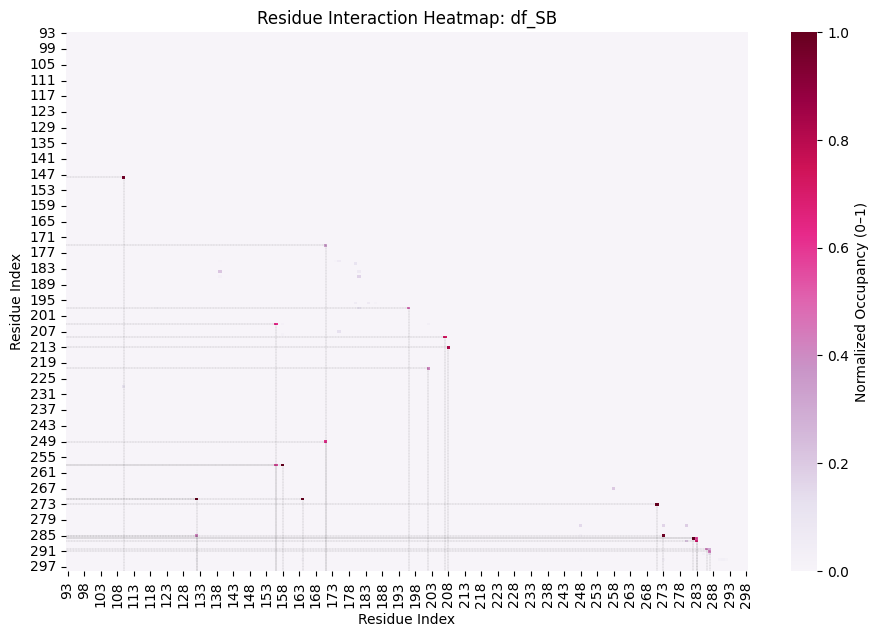

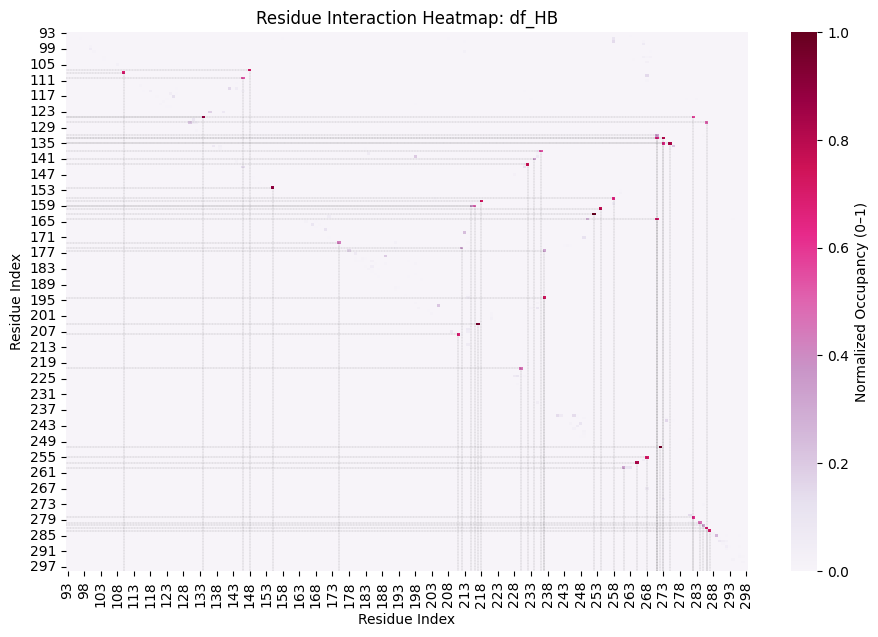

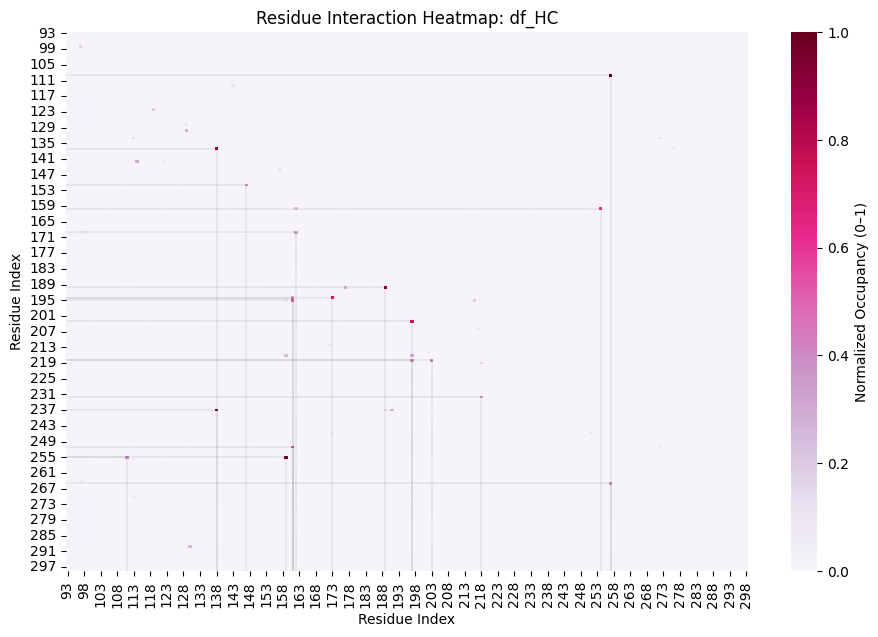

In [2]:

df_SB = pd.read_csv("salt-bridges_all.csv",names=["chain1", "res1","name1", "atom1","chain2", "res2","name", "atom2", "Occ"])
df_HB = pd.read_csv("hydrogen-bonds_all.csv",names=["chain1", "res1","name1", "atom1","chain2", "res2","name", "atom2", "Occ"])
df_HC = pd.read_csv("hydrophobic-clusters_all.csv",names=["chain1", "res1","name1", "atom1","chain2", "res2","name", "atom2", "Occ"])


# List of dataframes (replace with your actual data)
dataframes = [df_SB, df_HB, df_HC]  # Add all your dataframes here
# List of dataframes (replace these with your actual dataframes)
names = ["df_SB", "df_HB", "df_HC"]  # Names for each dataframe

# Residue range (93 to 298)
residues = np.arange(93, 299)


# Process each dataframe
for df, name in zip(dataframes, names):
    # Initialize a 205x205 matrix with residues 93 to 298
    matrix = pd.DataFrame(0, index=residues, columns=residues, dtype=float)

    # Normalize 'Occ' column
    df['Occ'] = df['Occ'] / df['Occ'].max()

    # Populate the matrix
    for _, row in df.iterrows():
        res1 = row['res1']
        res2 = row['res2']
        occ = row['Occ']
        matrix.loc[res1, res2] = occ

    # Save the matrix as a CSV file
    matrix_filename = f"{name}_matrix.csv"
    matrix.to_csv(matrix_filename)
    print(f"Matrix saved as {matrix_filename}")

    # Plot the heatmap
    plt.figure(figsize=(11, 7))
    sns.heatmap(
        matrix, 
        cmap='PuRd', 
        linewidths=0, 
        linecolor='white',
        cbar_kws={"label": "Normalized Occupancy (0–1)"}
    )
    # Identify cells with values above 0.2 or below -0.2
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            value = matrix.iloc[i, j]
            
            # Check if the value is greater than 0.2 or less than -0.2
            if value > 0.3 or value < -0.3:
                # Draw a dotted line from the point to the x-axis (vertical line)
                plt.plot([j + 0.5, j + 0.5], [i + 0.5, matrix.shape[0]], 'k:', lw=0.2)  # Thinner line and bottom            
                # Draw a dotted line from the point to the y-axis (horizontal line)
                plt.plot([j + 0.5, 0], [i + 0.5, i + 0.5], 'k:', lw=0.2)  # Horizontal line

    
    plt.title(f"Residue Interaction Heatmap: {name}")
    plt.xlabel("Residue Index")
    plt.ylabel("Residue Index")
    plt.savefig(f"WT_{name}")


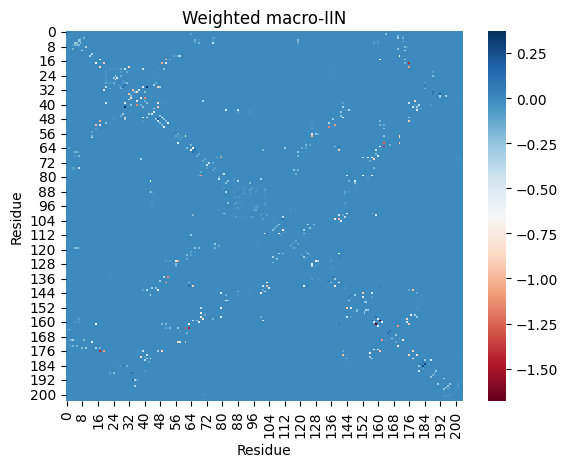

In [3]:
macro_IIN_weighted = np.loadtxt("macro_IIN_weighted.dat")

ax = sns.heatmap(macro_IIN_weighted, linewidth=0, cmap="RdBu")
ax.set_xlabel('Residue')
ax.set_ylabel('Residue')
ax.set_title('Weighted macro-IIN')
plt.show()